# Gun Violence in the US

This data came from kaggle: https://www.kaggle.com/jameslko/gun-violence-data#gun-violence-data_01-2013_03-2018.csv

## Context
There's currently a lack of large and easily-accessible amounts of detailed data on gun violence.

## Content
This project aims to change that; we make a record of more than 260k gun violence incidents, with detailed information about each incident, available in CSV format. We hope that this will make it easier for data scientists and statisticians to study gun violence and make informed predictions about future trends.

The CSV file contains data for all recorded gun violence incidents in the US between January 2013 and March 2018, inclusive.

## Acknowledgements
Where did you get the data?

The data was downloaded from gunviolencearchive.org. From the organization's description:

* Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. GVA will collect and check for accuracy, comprehensive information about gun-related violence in the U.S. and then post and disseminate it online.

## How did you get the data?

Because GVA limits the number of incidents that are returned from a single query, and because the website's "Export to CSV" functionality was missing crucial fields, it was necessary to obtain this dataset using web scraping techniques.

* Stage 1: For each date between 1/1/2013 and 3/31/2018, a Python script queried all incidents that happened at that particular date, then scraped the data and wrote it to a CSV file. Each month got its own CSV file, with the exception of 2013, since not many incidents were recorded from then.

* Stage 2: Each entry was augmented with additional data not directly viewable from the query results page, such as participant information, geolocation data, etc.

* Stage 3: The entries were sorted in order of increasing date, then merged into a single CSV file.

## Inspiration
I believe there are plenty of ways this dataset can be put to good use. If you have an interesting idea or feel like messing around with the data, then go for it.

I was originally inspired to compile it in the wake of the Parkland shooting and the mass media coverage that followed. Reports like this and this showed that Nikolas Cruz had exhibited plenty of warning signs on social media before the shooting; what if we could build a machine learning system that preemptively detected such signs?


In [45]:
%matplotlib notebook
%matplotlib inline

In [46]:
# Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import plotly.graph_objects as go
import seaborn as sns
import csv

In [47]:
# Importing CSVS
gun_violence = "C:\\Users\\kjyou\\Git\\gun_violence_data_2017.csv"
industry_friendly = "C:\\Users\\kjyou\\Git\\GunViolenceDataAnalysis\\Resources\Gun_Industry_Friendliness_By_State.csv"
gun_ownership = "C:\\Users\\kjyou\\Git\\GunViolenceDataAnalysis\\Resources\Gun_Ownership_Per_State.csv"
gun_regulations = "C:\\Users\\kjyou\\Git\\GunViolenceDataAnalysis\\Resources\Gun_Laws_Per_State.csv"
gun_violence_master = "C:\\Users\\kjyou\\Git\\Master\gun-violence-data_01-2013_03-2018.csv"
csv_path_violence = "C:\\Users\\kjyou\\Git\\Master\gun-violence-data_01-2013_03-2018 2.csv"

In [48]:
# Creating DataFrames
law_data_df = pd.read_csv(gun_regulations, encoding="utf-8")
violence_data = pd.read_csv(csv_path_violence, encoding="utf-8")
gun_violence_master_df = pd.read_csv(gun_violence_master, encoding="utf-8")
industry_friendly_df = pd.read_csv(industry_friendly, encoding="utf-8")
gun_regulations_df = pd.read_csv(gun_regulations, encoding="utf-8")
gun_ownership_df = pd.read_csv(gun_ownership, dtype={"guns_registered":float}, encoding="utf-8")
gun_violence_df = pd.read_csv(gun_violence, encoding="utf-8")

In [49]:
#JOHN

In [50]:
print ("columns in data :\n",gun_violence_master_df.columns)
print ("\n data - shape :",gun_violence_master_df.shape)

columns in data :
 Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

 data - shape : (239677, 29)


In [51]:
# Date conversion
gun_violence_master_df["date"] = pd.to_datetime(gun_violence_master_df["date"],format="%Y-%m-%d")

In [52]:
# Parse out the Yr, Mth, Day, Date from the date conversion
# Lable months numerically so they sort correctly in visuals
# Month_year needed for visuals
gun_violence_master_df["year"] = pd.DatetimeIndex(gun_violence_master_df["date"]).year
gun_violence_master_df["month"]= pd.DatetimeIndex(gun_violence_master_df["date"]).month
gun_violence_master_df["day"]  = pd.DatetimeIndex(gun_violence_master_df["date"]).day
gun_violence_master_df["month"] = gun_violence_master_df["month"].map({1:"01.JAN",2:"02.FEB",3:"03.MAR",4:"04.APR",5:"05.MAY",6:"06.JUN",7:"07.JUL",8:"08.AUG",9:"09.SEP",10:"10.OCT",11:"11.NOV",12:"12.DEC"})
gun_violence_master_df["month_year"] = gun_violence_master_df["month"]+"-"+gun_violence_master_df["year"].astype(str)

In [53]:
# rename columns
# sort date
gun_violence_master_df = gun_violence_master_df.rename(columns={"n_killed":"Killed","n_injured":"Injured"})
gun_violence_master_df = gun_violence_master_df.sort_values(by="date",ascending=True)

In [54]:
# Create a new column called "Total Killed/Injured" which adds n_killed & n_injured
gun_violence_master_df["Total Killed/Injured"] = gun_violence_master_df["Killed"] + gun_violence_master_df["Injured"]

In [55]:
# Re-order Columns
gun_violence_master_df = gun_violence_master_df[["incident_id", "year", "month", "day", "month_year", "date", "state", "city_or_county", "Total Killed/Injured",
                                    "Killed", "Injured", "participant_age_group", "participant_gender",
                                    "participant_name", "participant_relationship", "participant_status",
                                    "participant_type", "sources", "state_house_district", "state_senate_district",
                                    "incident_url", "source_url", "incident_url_fields_missing", "address"]]

In [56]:
# Checking numbers
killed = gun_violence_master_df["Killed"].sum()
injured = gun_violence_master_df["Injured"].sum()
total = gun_violence_master_df["Total Killed/Injured"].sum()
total

178870

In [57]:
# delete all rows that have 2013 or 2018 
gun_violence_master_df.drop(gun_violence_master_df[(gun_violence_master_df["year"] == 2013)].index, inplace=True)
gun_violence_master_df.drop(gun_violence_master_df[(gun_violence_master_df["year"] == 2018)].index, inplace=True)

In [58]:
# re-check numbers
total = gun_violence_master_df["Total Killed/Injured"].sum()
total

167870

In [59]:
# Groupby to see table
gun_violence_master_df.groupby("year")[["Total Killed/Injured","Killed","Injured"]].sum().style.format('{:,}')

,Total Killed/Injured,Killed,Injured
year,,,
2014,"35,559","12,557","23,002"
2015,"40,451","13,484","26,967"
2016,"45,646","15,066","30,580"
2017,"46,214","15,511","30,703"


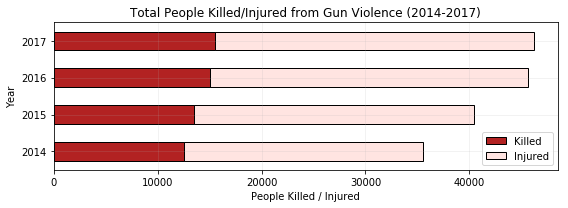

In [60]:
# Chart by years
total_chart = gun_violence_master_df.groupby("year")[["Killed","Injured"]].sum().plot(kind="barh", stacked=True, figsize=(8,3), linewidth = 1, color=['firebrick', 'mistyrose'], edgecolor = "k")
plt.grid(True,alpha=.2)
plt.xticks(rotation=0)
plt.xlabel("People Killed / Injured")
plt.ylabel("Year")
plt.legend(prop={"size":10})
plt.title("Total People Killed/Injured from Gun Violence (2014-2017)",fontsize = 12)
plt.tight_layout()
plt.savefig("GunViolenceVisuals/1.Total Killed Injured by Year (2014 to 2017).png")
plt.show()

In [61]:
# Groupby month-year to see table
gun_violence_master_df.groupby("month_year")[["Total Killed/Injured","Killed","Injured"]].sum().style.format('{:,}')

,Total Killed/Injured,Killed,Injured
month_year,,,
01.JAN-2014,"2,945","1,070","1,875"
01.JAN-2015,"2,931","1,123","1,808"
01.JAN-2016,"3,389","1,139","2,250"
01.JAN-2017,"3,960","1,356","2,604"
02.FEB-2014,"2,068",845,"1,223"
02.FEB-2015,"2,248",870,"1,378"
02.FEB-2016,"2,848",984,"1,864"
02.FEB-2017,"3,338","1,141","2,197"
03.MAR-2014,"2,558","1,007","1,551"


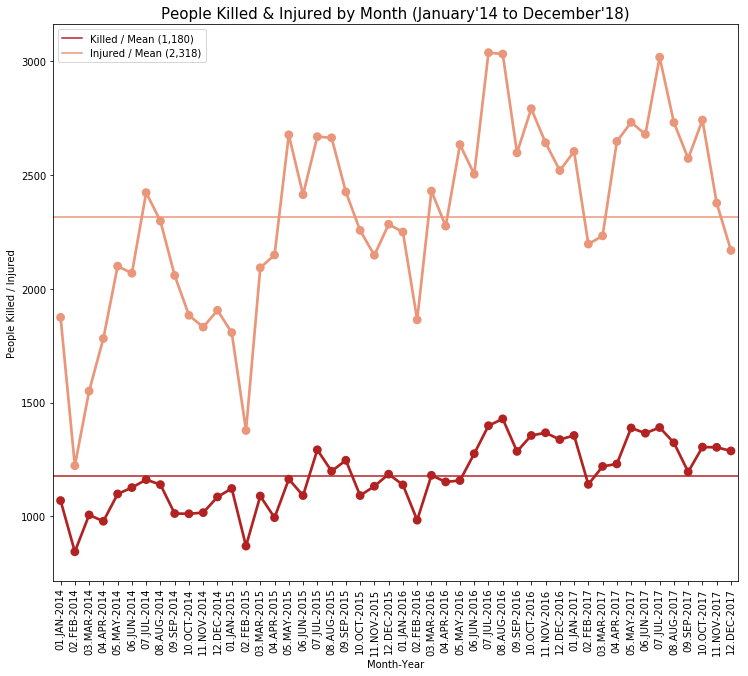

In [62]:
# chart out over monthyear
monthyear_viz = gun_violence_master_df.groupby("month_year")[["Killed","Injured"]].sum().reset_index()
mth_yr_order = gun_violence_master_df["month_year"].unique().tolist()
plt.figure(figsize=(10.5,9.5))
sns.pointplot(monthyear_viz["month_year"],monthyear_viz["Injured"],order=mth_yr_order,color="darksalmon",markers="o")
sns.pointplot(monthyear_viz["month_year"],monthyear_viz["Killed"],order=mth_yr_order,color="firebrick",markers="o")
plt.axhline(monthyear_viz["Killed"].mean(),label="Killed / Mean (1,180)",color="firebrick")
plt.axhline(monthyear_viz["Injured"].mean(),label="Injured / Mean (2,318)",color="darksalmon")
plt.xticks(rotation=90)
plt.xlabel("Month-Year")
plt.ylabel("People Killed / Injured")
plt.legend(loc="best",prop={"size":10})
plt.title("People Killed & Injured by Month (January'14 to December'18)",fontsize =15)
plt.tight_layout()
plt.savefig("GunViolenceVisuals/2.People Killed and Injured by Month_Year (Jan14 to Dec18).png")
plt.show()

In [63]:
# Groupby month to see table
gun_violence_master_df.groupby("month")[["Total Killed/Injured","Killed","Injured"]].sum().style.format('{:,}')

,Total Killed/Injured,Killed,Injured
month,,,
01.JAN,"13,225","4,688","8,537"
02.FEB,"10,502","3,840","6,662"
03.MAR,"12,805","4,498","8,307"
04.APR,"13,212","4,357","8,855"
05.MAY,"14,953","4,810","10,143"
06.JUN,"14,527","4,861","9,666"
07.JUL,"16,393","5,245","11,148"
08.AUG,"15,817","5,092","10,725"
09.SEP,"14,398","4,742","9,656"


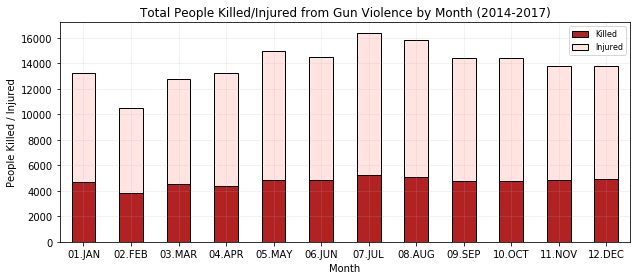

In [64]:
# Month Chart
month_chart = gun_violence_master_df.groupby("month")[["Killed","Injured"]].sum().plot(kind="bar",stacked=True, figsize=(9,4), linewidth = 1, color=['firebrick', 'mistyrose'], edgecolor = "k")

plt.grid(True,alpha=.2)
plt.xticks(rotation=0)
plt.xlabel("Month")
plt.ylabel("People Killed / Injured")
plt.legend(prop={"size":8})
plt.title("Total People Killed/Injured from Gun Violence by Month (2014-2017)",fontsize = 12)
plt.tight_layout()
plt.savefig("GunViolenceVisuals/3.Total People Killed Injured by Month (2014 to 2017).png")
plt.show()

In [65]:
# Drop all years except 2017
gun_violence_master_df.drop(gun_violence_master_df[(gun_violence_master_df["year"] == 2013)].index, inplace=True)
gun_violence_master_df.drop(gun_violence_master_df[(gun_violence_master_df["year"] == 2014)].index, inplace=True)
gun_violence_master_df.drop(gun_violence_master_df[(gun_violence_master_df["year"] == 2015)].index, inplace=True)
gun_violence_master_df.drop(gun_violence_master_df[(gun_violence_master_df["year"] == 2016)].index, inplace=True)
gun_violence_master_df.drop(gun_violence_master_df[(gun_violence_master_df["year"] == 2018)].index, inplace=True)

In [66]:
# Groupby month to see table for 2017
gun_violence_master_df.groupby("month")[["Total Killed/Injured","Killed","Injured"]].sum().style.format('{:,}')

,Total Killed/Injured,Killed,Injured
month,,,
01.JAN,"3,960","1,356","2,604"
02.FEB,"3,338","1,141","2,197"
03.MAR,"3,453","1,220","2,233"
04.APR,"3,879","1,231","2,648"
05.MAY,"4,121","1,389","2,732"
06.JUN,"4,045","1,366","2,679"
07.JUL,"4,409","1,391","3,018"
08.AUG,"4,055","1,324","2,731"
09.SEP,"3,769","1,196","2,573"


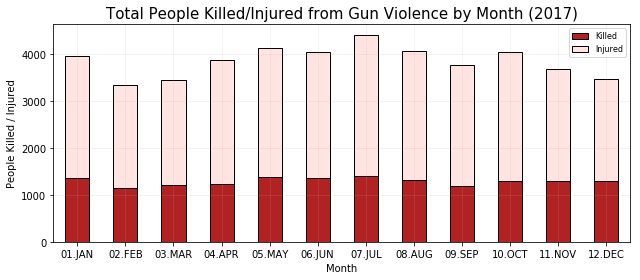

In [67]:
# Month chart for 2017 only
month_chart = gun_violence_master_df.groupby("month")[["Killed","Injured"]].sum().plot(kind="bar",stacked=True, figsize=(9,4), linewidth = 1, color=['firebrick', 'mistyrose'], edgecolor = "k")
plt.grid(True,alpha=.2)
plt.xticks(rotation=0)
plt.xlabel("Month")
plt.ylabel("People Killed / Injured")
plt.legend(prop={"size":8})
plt.title("Total People Killed/Injured from Gun Violence by Month (2017)",fontsize = 15)
plt.tight_layout()
plt.savefig("GunViolenceVisuals/4.Total People Killed Injured by Month (2017).png")
plt.show()

In [68]:
#JULIA

In [69]:
# Get the Yr, Mth, Day, Date from the date conversion
gun_violence_df["year"] = pd.DatetimeIndex(gun_violence_df["date"]).year
gun_violence_df["month"]= pd.DatetimeIndex(gun_violence_df["date"]).month
gun_violence_df["day"]  = pd.DatetimeIndex(gun_violence_df["date"]).day
gun_violence_df["month"] = gun_violence_df["month"].map({1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"})
gun_violence_df["month_year"] = gun_violence_df["month"]+"-"+gun_violence_df["year"].astype(str)

In [70]:
gun_violence_df = gun_violence_df.rename(columns={"n_killed":"killed","n_injured":"injured"})
gun_violence_df = gun_violence_df.sort_values(by="date",ascending=True)

In [73]:
# Create a new column called "Total Killed/Injured" which adds n_killed & n_injured
gun_violence_df["Total Killed/Injured"] = gun_violence_df["killed"] + gun_violence_df["injured"]

In [75]:
# Re-order Columns
gun_violence_df = gun_violence_df[["incident_id", "date", "state", "city_or_county", "Total Killed/Injured",
                                    "killed", "injured", "participant_age_group", "participant_gender",
                                     "participant_relationship", "participant_status",
                                    "participant_type",  "state_house_district", "state_senate_district",
                                    ]]

In [76]:
total_killed = gun_violence_df["killed"].sum()
total_injured = gun_violence_df["injured"].sum()
overall_killed_injured = total_killed + total_injured
overall_killed_injured

46214

In [77]:
#find top 20 states
top_states = gun_violence_df.groupby(['state']).agg({'Total Killed/Injured':['sum']})
#top_states
top_states.columns = top_states.columns.droplevel(0)
top_states_final = top_states.sort_values(['sum'], ascending=False).head(51)
#top_states_final
top_states_df = pd.DataFrame(top_states_final)
#top_states_df
top_states_df.columns = ['Gun Violence']
#top_states_df
top_states_df = top_states_df.reset_index()
top_20_df = top_states_df.head(20)
top_20_df = top_20_df.sort_values(['Gun Violence'], ascending=True)
top_20_df


,state,Gun Violence
19,Mississippi,917
18,New Jersey,938
17,Michigan,1140
16,Indiana,1144
15,South Carolina,1186
14,Virginia,1324
13,Maryland,1335
12,Alabama,1400
11,New York,1439
10,Missouri,1530


In [78]:
state20 = top_20_df['state']
gun_violence20 = top_20_df['Gun Violence']

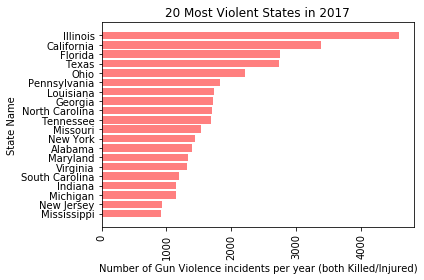

In [79]:

plt.barh(state20, gun_violence20, color='red', alpha=0.5, align="center")
#plt.xlim(-0.75, len(state)-0.25)
#plt.ylim(0, max(gun_violence))
plt.xticks(rotation='vertical')
plt.title("20 Most Violent States in 2017")
plt.xlabel("Number of Gun Violence incidents per year (both Killed/Injured)")
plt.ylabel("State Name")
plt.tight_layout()
plt.savefig("GunViolenceVisuals/5.20 Most Violent States in 2017.png")
plt.show()

In [80]:
census = "C:\\Users\\kjyou\\Git\\GunViolenceDataAnalysis\\Resources\population.xlsx" 

census_df = pd.read_excel(census)
census_df.head()

,state,Population 2017
0,Alabama,4875120
1,Alaska,739786
2,Arizona,7048876
3,Arkansas,3002997
4,California,39399349


In [81]:

combined_data_states = pd.merge(top_states_df,census_df,how='outer', on='state')
population_adjusted = combined_data_states["Population 2017"]/100000
combined_data_states["Adjusted Violence"] = combined_data_states["Gun Violence"] / population_adjusted
combined_data_states.head(50)
#combined_data.states = combined_data.states.columns.droplevel(0)
combined_data_states_two= combined_data_states.sort_values(['Adjusted Violence'], ascending=False)
top_20_adjusted = combined_data_states_two.head(20)
top_20_adjusted
top_20_adjusted = top_20_adjusted.sort_values(['Adjusted Violence'], ascending=True)
top_20_adjusted


,state,Gun Violence,Population 2017,Adjusted Violence
30,Kansas,416,2910689,14.292149
14,Virginia,1324,8465207,15.640492
23,Oklahoma,633,3932640,16.096058
7,Georgia,1715,10413055,16.469710
8,North Carolina,1709,10270800,16.639405
16,Indiana,1144,6660082,17.176966
20,Kentucky,791,4453874,17.759820
40,Alaska,139,739786,18.789217
4,Ohio,2217,11664129,19.006991
22,Arkansas,653,3002997,21.744943


In [82]:
state_adjusted = top_20_adjusted['state']
gun_violence_adjusted = top_20_adjusted['Adjusted Violence']

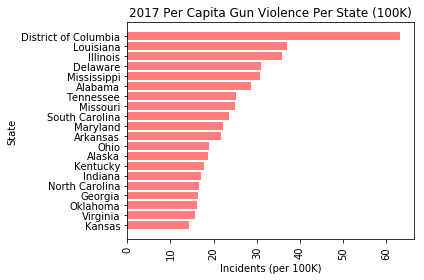

In [84]:
plt.barh(state_adjusted, gun_violence_adjusted, color='r', alpha=0.5, align="center")
#plt.xlim(-0.75, len(state)-0.25)
#plt.ylim(0, max(gun_violence))
plt.xticks(rotation='vertical')
plt.title("2017 Per Capita Gun Violence Per State (100K)")
plt.xlabel("Incidents (per 100K)")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("GunViolenceVisuals/6.2017 Per Capita Gun Violence Per State (100K).png")
plt.show()

In [85]:
#find top Cities 
top_cities = gun_violence_df.groupby(['city_or_county']).agg({'Total Killed/Injured':['sum']})

top_cities.columns = top_cities.columns.droplevel(0)
top_cities_final = top_cities.sort_values(['sum'], ascending=False).head(51)

top_cities_df = pd.DataFrame(top_cities_final)

top_cities_df.columns = ['Gun Violence']

top_cities_df = top_cities_df.reset_index()
top_20_df_cities = top_cities_df.head(20)
top_20_df_cities = top_20_df_cities.sort_values(['Gun Violence'], ascending=True)
top_20_df_cities

,city_or_county,Gun Violence
19,Nashville,317
18,Las Vegas,321
17,Louisville,327
16,Richmond,346
15,San Antonio,350
14,Kansas City,361
13,Indianapolis,380
12,Jacksonville,453
11,Washington,453
10,Cleveland,472


In [86]:
#find top Cities 
top_cities = gun_violence_df.groupby(['city_or_county']).agg({'Total Killed/Injured':['sum']})

top_cities.columns = top_cities.columns.droplevel(0)
top_cities_final = top_cities.sort_values(['sum'], ascending=False).head(51)

top_cities_df = pd.DataFrame(top_cities_final)

top_cities_df.columns = ['Gun Violence']

top_cities_df = top_cities_df.reset_index()
top_20_df_cities = top_cities_df.head(20)
top_20_df_cities = top_20_df_cities.sort_values(['Gun Violence'], ascending=True)
top_20_df_cities

,city_or_county,Gun Violence
19,Nashville,317
18,Las Vegas,321
17,Louisville,327
16,Richmond,346
15,San Antonio,350
14,Kansas City,361
13,Indianapolis,380
12,Jacksonville,453
11,Washington,453
10,Cleveland,472


In [87]:
cities = top_20_df_cities['city_or_county']
gun_violence_cities = top_20_df_cities['Gun Violence']

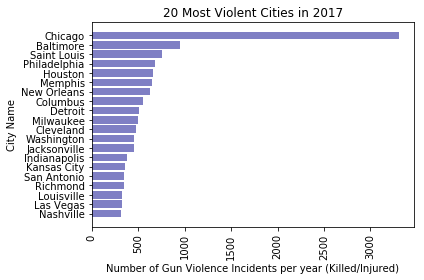

In [88]:
plt.barh(cities, gun_violence_cities, color='darkblue', alpha=0.5, align="center")
#plt.xlim(-0.75, len(state)-0.25)
#plt.ylim(0, max(gun_violence))
plt.xticks(rotation='vertical')
plt.title("20 Most Violent Cities in 2017")
plt.xlabel("Number of Gun Violence Incidents per year (Killed/Injured)")
plt.ylabel("City Name")
plt.tight_layout()
plt.savefig("GunViolenceVisuals/7.20 Most Violent Cities in 2017.png")
plt.show()

In [89]:
census_cities = "C:\\Users\\kjyou\\Git\\GunViolenceDataAnalysis\\Resources\population_cities.xlsx"

census_df_cities = pd.read_excel(census_cities)
census_df_cities.head()

,city_or_county,Population 2017
0,Chicago,2716000
1,Baltimore,621647
2,Saint Louis,334000
3,Philadelphia,1566400
4,Houston,2313000


In [90]:
combined_data_cities = pd.merge(top_20_df_cities,census_df_cities,how='outer', on='city_or_county')
combined_data_cities

population_adjusted_cities = combined_data_cities["Population 2017"]/100000
combined_data_cities["Adjusted Violence Cities"] = combined_data_cities["Gun Violence"] / population_adjusted_cities
combined_data_cities.head(20)

combined_data_cities_two= combined_data_cities.sort_values(['Adjusted Violence Cities'], ascending=False)
top_20_adjusted_cities = combined_data_cities_two.head(20)
top_20_adjusted_cities
top_20_adjusted_cities = top_20_adjusted_cities.sort_values(['Adjusted Violence Cities'], ascending=True)
top_20_adjusted_cities

,city_or_county,Gun Violence,Population 2017,Adjusted Violence Cities
4,San Antonio,350,1500000,23.333333
15,Houston,657,2313000,28.404669
6,Indianapolis,380,872680,43.544025
16,Philadelphia,683,1566400,43.603166
0,Nashville,317,691243,45.859416
1,Las Vegas,321,641676,50.025246
7,Jacksonville,453,892062,50.781224
2,Louisville,327,620118,52.731899
12,Columbus,547,879170,62.217774
8,Washington,453,700505,64.667633


In [91]:
cities_adjusted = top_20_adjusted_cities['city_or_county']
gun_violence_adjusted_cities = top_20_adjusted_cities['Adjusted Violence Cities']

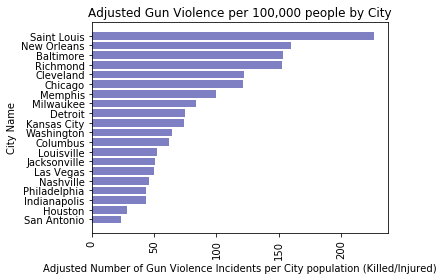

In [92]:
plt.barh(cities_adjusted, gun_violence_adjusted_cities, color='darkblue', alpha=0.5, align="center")
#plt.xlim(-0.75, len(state)-0.25)
#plt.ylim(0, max(gun_violence))
plt.xticks(rotation='vertical')
plt.title("Adjusted Gun Violence per 100,000 people by City")
plt.xlabel("Adjusted Number of Gun Violence Incidents per City population (Killed/Injured)")
plt.ylabel("City Name")
plt.tight_layout()
plt.savefig("GunViolenceVisuals/8.Adjusted Gun Violence per 100,000 people by City.png")
plt.show()

In [94]:
poverty_rate = "C:\\Users\\kjyou\\Git\\GunViolenceDataAnalysis\\Resources\poverty rate.xlsx"

poverty_df = pd.read_excel(poverty_rate)

In [95]:
combined_poverty = pd.merge(top_20_df_cities,poverty_df,how='outer', on='city_or_county')
combined_poverty
combined_poverty= combined_poverty.sort_values(['Gun Violence'], ascending=False)
top_20_poverty = combined_poverty.head(20)
top_20_poverty
top_20_poverty = top_20_poverty.sort_values(['Gun Violence'], ascending=True)
top_20_poverty

,city_or_county,Gun Violence,Poverty Rate 2017(%)
0,Nashville,317,17.2
1,Las Vegas,321,16.2
2,Louisville,327,7.2
3,Richmond,346,25.2
4,San Antonio,350,18.6
5,Kansas City,361,17.3
6,Indianapolis,380,20.1
7,Jacksonville,453,16.4
8,Washington,453,11.3
9,Cleveland,472,36.2


In [96]:
cities_poverty = top_20_poverty['city_or_county']
poverty_gun_violence = top_20_poverty['Gun Violence']
poverty_level = top_20_poverty['Poverty Rate 2017(%)']

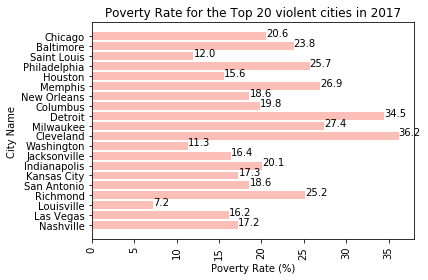

In [97]:
plt.barh(cities_poverty, poverty_level, color='salmon', alpha=0.5, align="center")
#plt.xlim(-0.75, len(state)-0.25)
#plt.ylim(0, max(gun_violence))
plt.xticks(rotation='vertical')
plt.title("Poverty Rate for the Top 20 violent cities in 2017")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("City Name")
plt.tight_layout()
for i, v in enumerate (list(poverty_level)):
    plt.text(v, i, str(v), color= 'black')

plt.savefig("GunViolenceVisuals/9.Poverty Rate for the Top 20 Violent Cities in 2017.png")
plt.show()

In [98]:
#DAVIS

In [100]:
#creating a list of incidents by each state and removing Washington D.C.
state_groupby = violence_data.groupby("state")

state_list = list(state_groupby["state"])

state_group_count_dc = state_groupby.count()["incident_id"]

state_group_count = list(state_group_count_dc.drop("District of Columbia", axis = 0))

In [102]:
#creating a new dataframe with states and total laws by each state
state_total = law_data_df[["state","lawtotal"]]

In [104]:
state_list = list(state_total["state"])
law_list = list(state_total["lawtotal"])

states_df = pd.DataFrame({"State": state_list,
                 "Laws": law_list,
                 "Incidents": state_group_count})

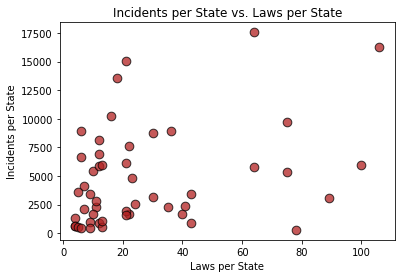

In [107]:
#using the two lists created above to make a scatter plot of incidents per state vs. laws per state
plt.scatter(law_list, state_group_count, c="firebrick", edgecolors="black", s=75, alpha=0.75)
plt.title("Incidents per State vs. Laws per State")
plt.xlabel("Laws per State")
plt.ylabel("Incidents per State")
plt.savefig("GunViolenceVisuals/10.Incidents per State vs. Laws per State.png")
plt.show()

In [108]:
#KYLE

In [147]:
#Creating a new dataframe
ownership_metrics_df = pd.merge(top_states_df,gun_ownership_df,how='outer', on='state')

In [132]:
#Creating a Choropleth Map
fig = go.Figure(data=go.Choropleth(
    locations=ownership_metrics_df['code'], # Spatial coordinates
    z = ownership_metrics_df['guns_registered'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Guns Register Per State",
))

fig.update_layout(
    title_text = '2017 Guns Registered Per State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [133]:
# Saving Static Image
fig.write_image("GunViolenceVisuals/11.2017 Guns Registered Per State.png")

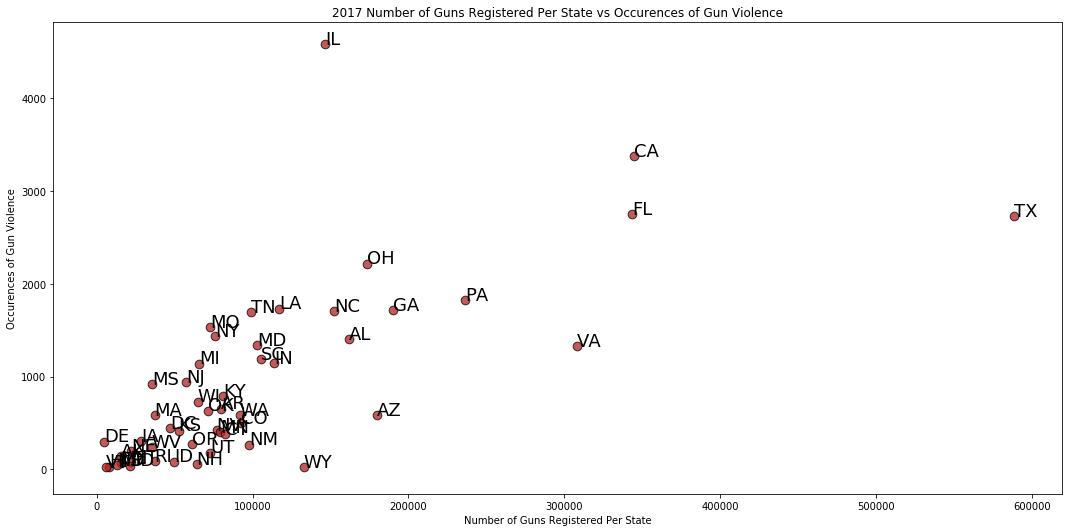

In [134]:
# Adjusting Size
plt.figure(figsize=(15, 7.5))

# simulating a pandas df['type'] column
registered_state = ownership_metrics_df['code']
x_regcoords = ownership_metrics_df['guns_registered']
y_regcoords = ownership_metrics_df['Gun Violence']

# Adding labels to scatter points and plotting chart
for i,registered_state in enumerate(registered_state):
    x = x_regcoords[i]
    y = y_regcoords[i]
    plt.scatter(x, y, marker='o', color='firebrick', edgecolors="black", s=75, alpha=0.75)
    plt.text(x+0.3, y+0.3, registered_state, fontsize=18)

# Adding labels, saving, and showing chart    
plt.title("2017 Number of Guns Registered Per State vs Occurences of Gun Violence")
plt.xlabel("Number of Guns Registered Per State")
plt.ylabel("Occurences of Gun Violence")
plt.tight_layout()
plt.savefig("GunViolenceVisuals/12.2017 Number of Guns Registered Per State vs Occurences of Gun Violence.png")
plt.show()

In [135]:
#Creating a Choropleth Map
fig = go.Figure(data=go.Choropleth(
    locations=ownership_metrics_df['code'], # Spatial coordinates
    z = ownership_metrics_df['guns_per_capita'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Guns Per Capita (100k)",
))

fig.update_layout(
    title_text = '2017 Guns Per Capita',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [136]:
# Saving Static Image
fig.write_image("GunViolenceVisuals/13.2017 Guns Per Capita.png")

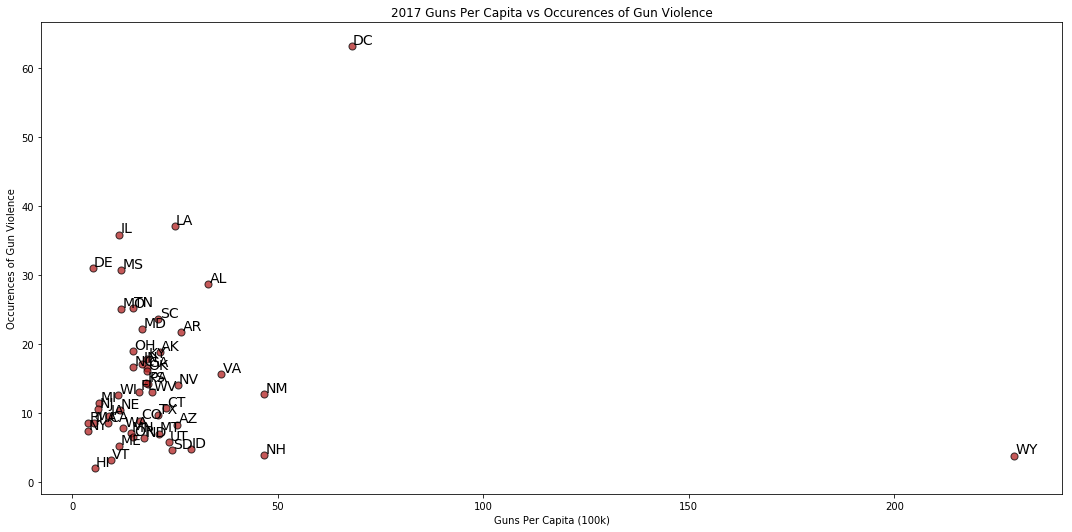

In [137]:
# Adjusting Size
plt.figure(figsize=(15, 7.5))

# simulating a pandas df['type'] column
ownership_state = ownership_metrics_df['code']
x_coords = ownership_metrics_df['guns_per_capita']
y_coords =combined_data_states["Adjusted Violence"]

# Adding labels to scatter points and plotting chart
for i,ownership_state in enumerate(ownership_state):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='firebrick', edgecolors="black", s=50, alpha=0.75)
    plt.text(x+0.3, y+0.3, ownership_state, fontsize=14)
    
# Adding labels, saving, and showing chart  
plt.title("2017 Guns Per Capita vs Occurences of Gun Violence")
plt.xlabel("Guns Per Capita (100k)")
plt.ylabel("Occurences of Gun Violence")
plt.tight_layout()
plt.savefig("GunViolenceVisuals/14.2017 Guns Per Capita vs Occurences of Gun Violence.png")
plt.show()

In [140]:
#Creating a Choropleth Map


fig = go.Figure(data=go.Choropleth(
    locations=industry_friendly_df['code'], # Spatial coordinates
    z = industry_friendly_df['gun friendly'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Ranking (50 Is Best)",
))

fig.update_layout(
    title_text = '2017 Best States for the Gun Industry',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [141]:
# Saving Static Image
fig.write_image("GunViolenceVisuals/15.2017 Best States for the Gun Industry.png")

In [143]:
#Merging DataFrames
industry_df = pd.merge(ownership_metrics_df,industry_friendly_df,how='outer', on='state')
industry_df = industry_df.drop(['code_y'], axis=1)
industry_df = industry_df.rename(index=str, columns={"code_x": "code"})

In [144]:
#Dropping NAN items
industry_drop_df = industry_df.dropna()
industry_drop_df = industry_drop_df.reset_index(drop=True)

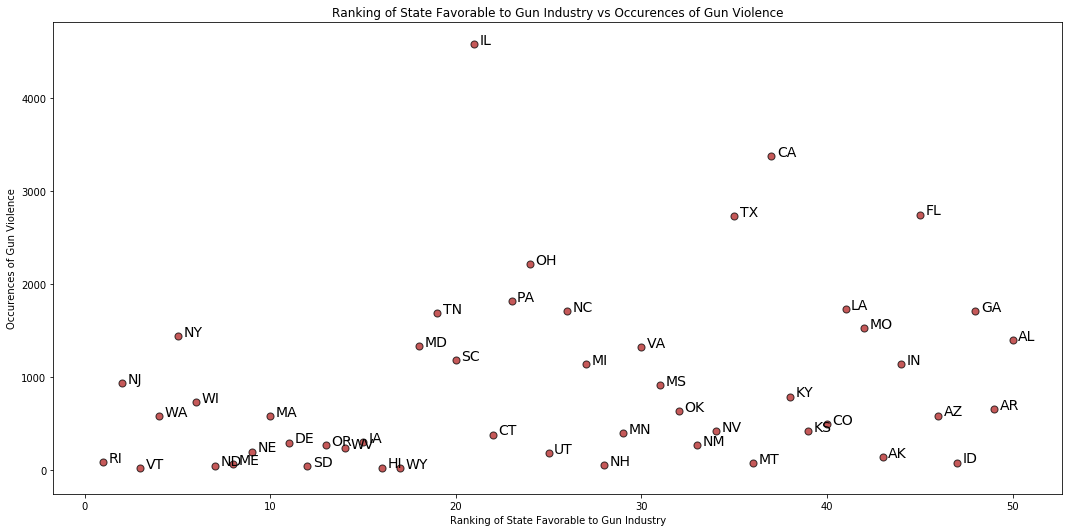

In [148]:
# Adjusting Size
plt.figure(figsize=(15, 7.5))

# simulating a pandas df['type'] column
industry_state = industry_drop_df['code']
industry_coords_x = industry_drop_df['gun friendly']
industry_coords_y = industry_drop_df['Gun Violence']

#Adding labels to scatter points and plotting chart
for i,industry_state in enumerate(industry_state):
    x = industry_coords_x[i]
    y = industry_coords_y[i]
    plt.scatter(x, y, marker='o', color='firebrick', edgecolors="black", s=50, alpha=0.75)
    plt.text(x+0.3, y+0.3, industry_state, fontsize=14)

# Adding labels, saving, and showing chart
plt.title("Ranking of State Favorable to Gun Industry vs Occurences of Gun Violence")
plt.xlabel("Ranking of State Favorable to Gun Industry")
plt.ylabel("Occurences of Gun Violence")
plt.tight_layout()
plt.savefig("GunViolenceVisuals/16.Ranking of State Favorable to Gun Industry vs Occurences of Gun Violence.png")
plt.show()